# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city
city_response = requests.get(city_url)
city_weather = city_response.json()
city_weather


{'coord': {'lon': 15.5654, 'lat': 41.8384},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 72.46,
  'feels_like': 72.05,
  'temp_min': 72.46,
  'temp_max': 72.46,
  'pressure': 1017,
  'humidity': 56,
  'sea_level': 1017,
  'grnd_level': 993},
 'visibility': 10000,
 'wind': {'speed': 2.37, 'deg': 203, 'gust': 3.02},
 'clouds': {'all': 1},
 'dt': 1687237529,
 'sys': {'country': 'IT', 'sunrise': 1687231354, 'sunset': 1687286149},
 'timezone': 7200,
 'id': 3167940,
 'name': 'Sannicandro Garganico',
 'cod': 200}

In [42]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        print(city_lat)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
62.456
Processing Record 2 of Set 1 | grytviken
-54.2811
Processing Record 3 of Set 1 | vernon
50.2581
Processing Record 4 of Set 1 | port alfred
-33.5906
Processing Record 5 of Set 1 | vilyuchinsk
52.9306
Processing Record 6 of Set 1 | spanish wells
26.323
Processing Record 7 of Set 1 | puerto baquerizo moreno
-0.9
Processing Record 8 of Set 1 | port sudan
19.6175
Processing Record 9 of Set 1 | port-aux-francais
-49.35
Processing Record 10 of Set 1 | puerto natales
-51.7236
Processing Record 11 of Set 1 | medicine hat
50.0501
Processing Record 12 of Set 1 | avarua
-21.2078
Processing Record 13 of Set 1 | okhotsk
59.3833
Processing Record 14 of Set 1 | invercargill
-46.4
Processing Record 15 of Set 1 | ancud
-41.8697
Processing Record 16 of Set 1 | susuman
62.7833
Processing Record 17 of Set 1 | margaret river
-33.95
Processing Record 18 of Set 1 | hawaiian paradise park
19.5933
Proce

-42.4667
Processing Record 11 of Set 4 | onega
63.9061
Processing Record 12 of Set 4 | mount isa
-20.7333
Processing Record 13 of Set 4 | bordj el kiffan
36.7487
Processing Record 14 of Set 4 | eyl
7.9803
Processing Record 15 of Set 4 | tazacorte
28.629
Processing Record 16 of Set 4 | hadibu
12.65
Processing Record 17 of Set 4 | coahuayana de hidalgo
18.7
Processing Record 18 of Set 4 | bandarbeyla
9.4942
Processing Record 19 of Set 4 | west island
-12.1568
Processing Record 20 of Set 4 | yen bai
21.7
Processing Record 21 of Set 4 | proletariy
58.4342
Processing Record 22 of Set 4 | ola
59.5833
Processing Record 23 of Set 4 | toga village
City not found. Skipping...
Processing Record 24 of Set 4 | ketchikan
55.3422
Processing Record 25 of Set 4 | san antonio de pale
-1.4014
Processing Record 26 of Set 4 | ampanihy
-24.7
Processing Record 27 of Set 4 | altamira
-3.2033
Processing Record 28 of Set 4 | kingston
17.997
Processing Record 29 of Set 4 | vingt cinq
City not found. Skipping...


City not found. Skipping...
Processing Record 25 of Set 7 | lebu
-37.6167
Processing Record 26 of Set 7 | akhtubinsk
48.2795
Processing Record 27 of Set 7 | kapa'a
22.0752
Processing Record 28 of Set 7 | tanrake village
City not found. Skipping...
Processing Record 29 of Set 7 | hasaki
35.7333
Processing Record 30 of Set 7 | novodvinsk
64.4165
Processing Record 31 of Set 7 | naze
28.3667
Processing Record 32 of Set 7 | magdalena contreras
19.2833
Processing Record 33 of Set 7 | robertsport
6.7533
Processing Record 34 of Set 7 | karaton
-6.3424
Processing Record 35 of Set 7 | dickinson
29.4608
Processing Record 36 of Set 7 | port lincoln
-34.7333
Processing Record 37 of Set 7 | gizo
-8.103
Processing Record 38 of Set 7 | las heras
-46.5419
Processing Record 39 of Set 7 | tranovaho
City not found. Skipping...
Processing Record 40 of Set 7 | nuku'alofa
-21.1333
Processing Record 41 of Set 7 | ban phai
16.06
Processing Record 42 of Set 7 | mil'kovo
55.6078
Processing Record 43 of Set 7 | f

25.5333
Processing Record 36 of Set 10 | tindouf
27.6711
Processing Record 37 of Set 10 | nyaunglebin
17.95
Processing Record 38 of Set 10 | yagry
City not found. Skipping...
Processing Record 39 of Set 10 | santa maria del oro
25.9333
Processing Record 40 of Set 10 | manatutu
City not found. Skipping...
Processing Record 41 of Set 10 | along
28.1667
Processing Record 42 of Set 10 | bujumbura
-3.3822
Processing Record 43 of Set 10 | longboat key
27.4125
Processing Record 44 of Set 10 | smithers
54.7804
Processing Record 45 of Set 10 | lida
53.8833
Processing Record 46 of Set 10 | turan
16.0678
Processing Record 47 of Set 10 | keflavik
64.0049
Processing Record 48 of Set 10 | sao raimundo nonato
-9.0153
Processing Record 49 of Set 10 | beltangadi
13.9833
Processing Record 0 of Set 11 | usinsk
65.9939
Processing Record 1 of Set 11 | sandnessjoen
66.0217
Processing Record 2 of Set 11 | tangalle
6.024
Processing Record 3 of Set 11 | kota kinabalu
5.9749
Processing Record 4 of Set 11 | haym

In [39]:
city_url

'https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1bfa3d3e8c22cbc540c561ec0fc7d409&q=sannicandro garganico'

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,53.56,58,57,8.01,CA,1687237809
1,grytviken,-54.2811,-36.5092,28.54,78,51,10.45,GS,1687237913
2,vernon,50.2581,-119.2691,52.75,76,100,0.00,CA,1687237913
3,port alfred,-33.5906,26.8910,51.19,66,80,7.00,ZA,1687237914
4,vilyuchinsk,52.9306,158.4028,50.27,91,100,3.83,RU,1687237914


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,53.56,58,57,8.01,CA,1687237809
1,grytviken,-54.2811,-36.5092,28.54,78,51,10.45,GS,1687237913
2,vernon,50.2581,-119.2691,52.75,76,100,0.00,CA,1687237913
3,port alfred,-33.5906,26.8910,51.19,66,80,7.00,ZA,1687237914
4,vilyuchinsk,52.9306,158.4028,50.27,91,100,3.83,RU,1687237914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

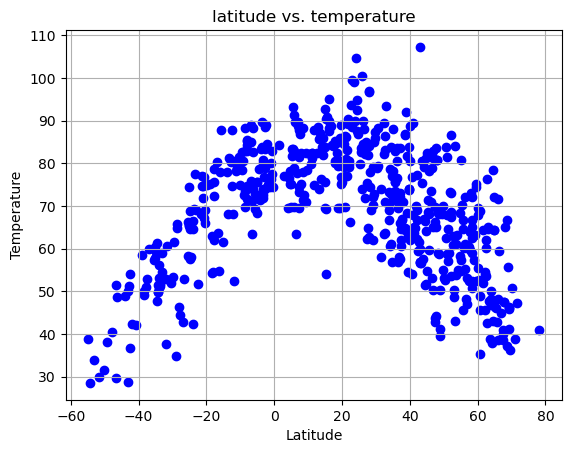

In [48]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='blue')

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('latitude vs. temperature')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

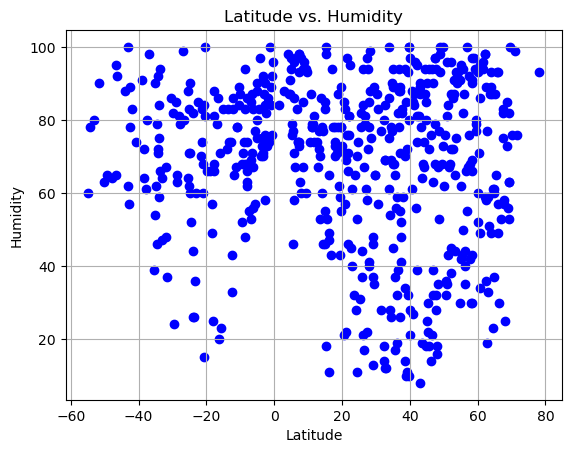

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

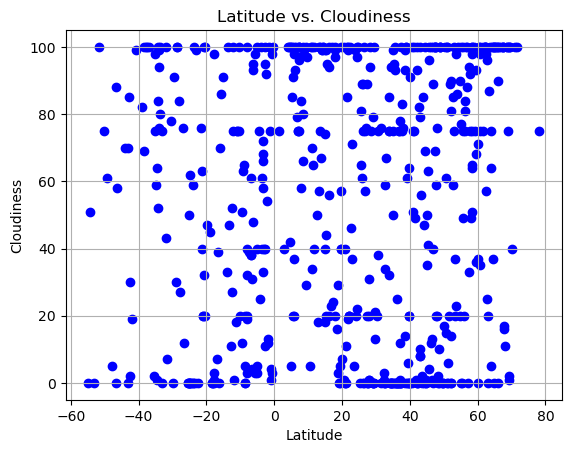

In [50]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

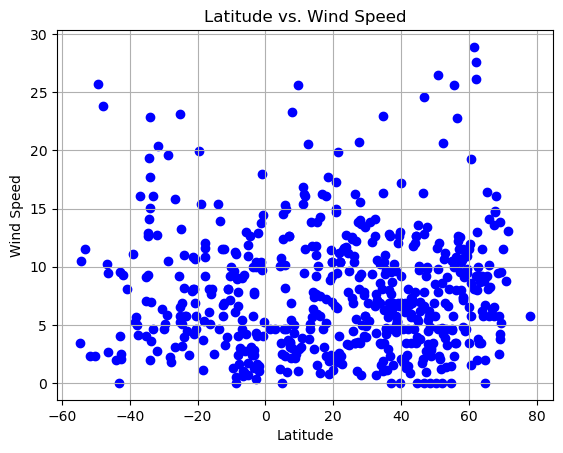

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots


from scipy.stats import linregress

def linear_regression_plot(df, x, y):

    slope, intercept, rvalue, pvalue, stderr = linregress(df[x], df[y])

    plt.scatter(df[x], df[y])

    plt.plot(df[x], intercept + slope*df[x], 'r')

    title = f"{x.capitalize()} vs. {y.capitalize()} Linear Regression"
    plt.title(title)
    
    plt.xlabel(x)
    plt.ylabel(y)

  
    plt.show()

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi= city_data_df[city_data_df['Lat']>= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,53.56,58,57,8.01,CA,1687237809
2,vernon,50.2581,-119.2691,52.75,76,100,0.00,CA,1687237913
4,vilyuchinsk,52.9306,158.4028,50.27,91,100,3.83,RU,1687237914
5,spanish wells,26.3230,-81.7957,83.97,84,0,3.44,US,1687237914
7,port sudan,19.6175,37.2164,88.92,55,57,6.98,SD,1687237915


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi= city_data_df[city_data_df['Lat'] <= 0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,28.54,78,51,10.45,GS,1687237913
3,port alfred,-33.5906,26.8910,51.19,66,80,7.00,ZA,1687237914
6,puerto baquerizo moreno,-0.9000,-89.6000,76.39,84,1,9.75,EC,1687237915
8,port-aux-francais,-49.3500,70.2167,38.19,65,61,25.70,TF,1687237916
9,puerto natales,-51.7236,-72.4875,29.89,90,100,2.33,CL,1687237884


###  Temperature vs. Latitude Linear Regression Plot

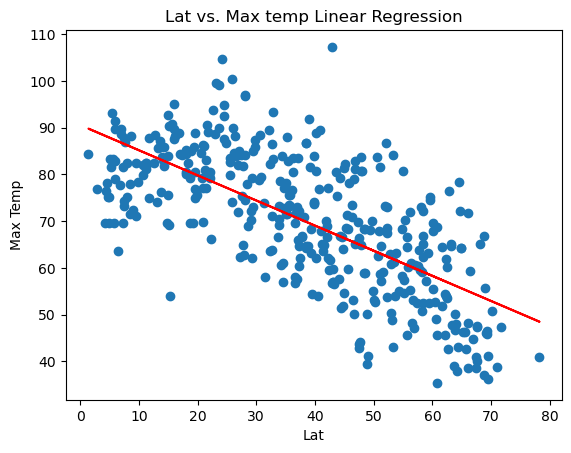

In [70]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Max Temp')

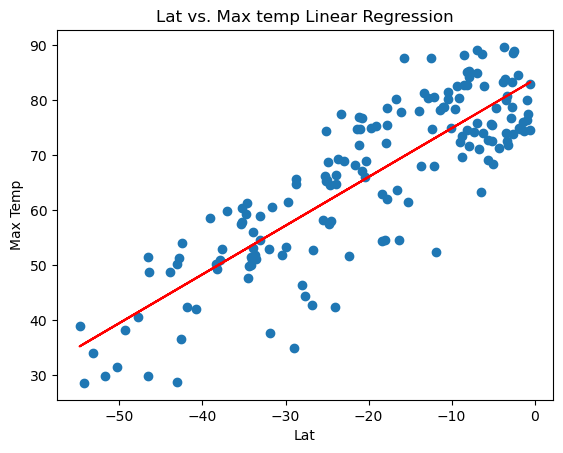

In [71]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Max Temp')

**Discussion about the linear relationship:** The Temperature lowers as the latitude rises in the northern hemisphere. As the Temperature rises as the latitude lowers in the southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

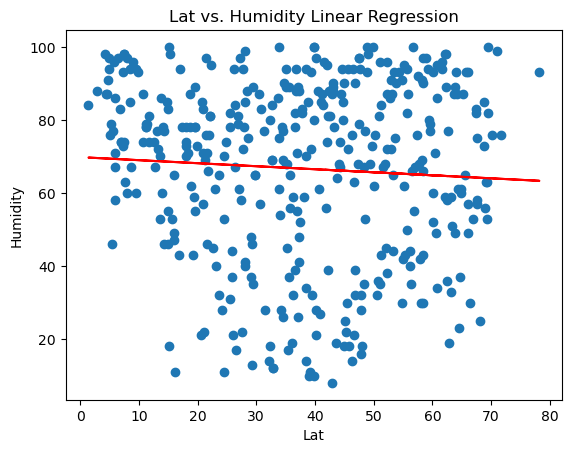

In [72]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Humidity')

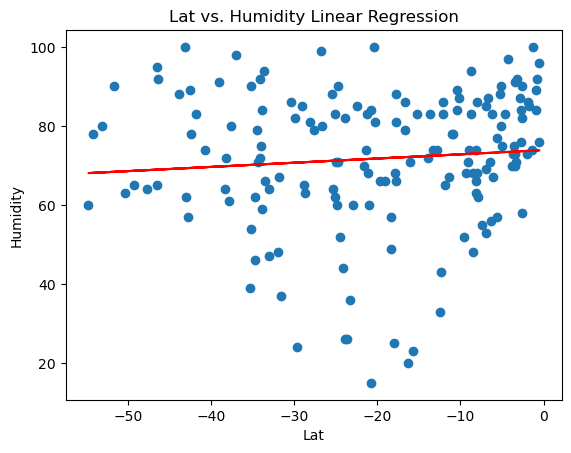

In [73]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Humidity')

**Discussion about the linear relationship:** The linear trend in humidity remains the same in the Northern and Southern Hemisphere no matter the range of the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

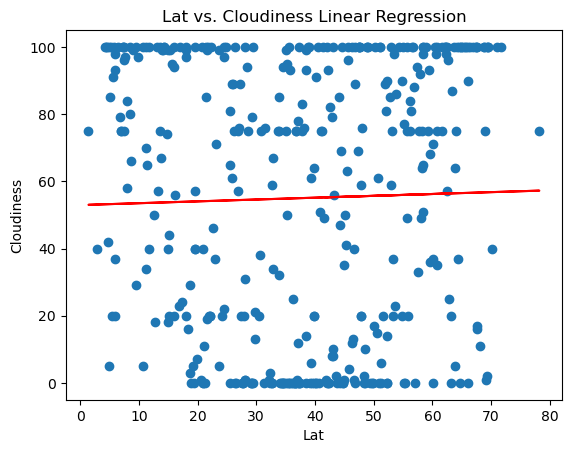

In [74]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Cloudiness')

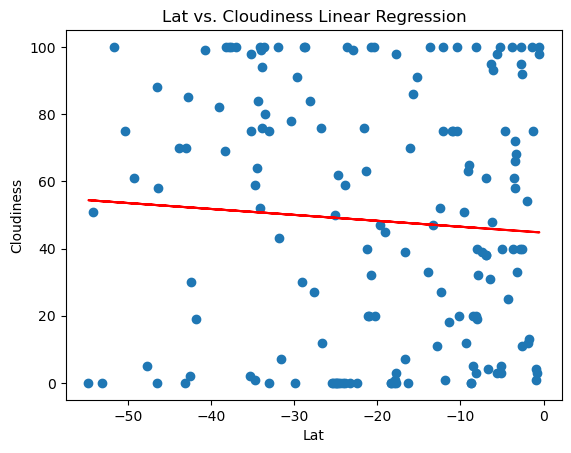

In [77]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Cloudiness')

**Discussion about the linear relationship:** The linear trend for the northern hemisphere goes slightly upwards while the linear trend goes slightly downwards in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

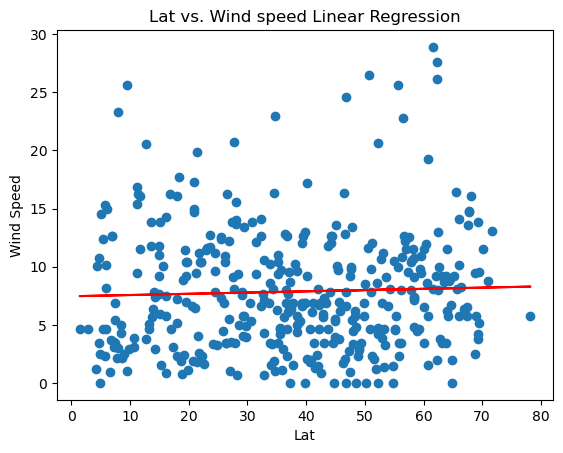

In [78]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Wind Speed')

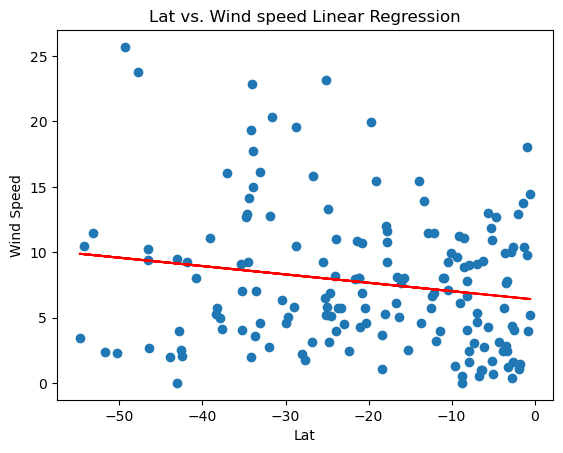

In [79]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Wind Speed')

**Discussion about the linear relationship:** In the Norther Hemisphere the line for the wind speed remains below 10 mph but seems to go slightly upwards. While in the Southern Hemisphere the line for the wind speed goes slightly downwards and is also below 10 mph.